In [2]:
import tdt
from pathlib import Path
import h5py
import pandas as pd
import numpy as np

from coral.config_loader import ConfigLoader
from matplotlib import pyplot as plt

In [3]:
EXPERIMENTAL_CONFIGS = '/Volumes/fsmresfiles/Basic_Sciences/Phys/Lerner_Lab_tnl2633/Mike/LHA_dopamine/LH_NAC_Headfix_FP/Photometry/Pav_Training/claire_cohort/conf/config.yaml'
CONFIGS = ConfigLoader(EXPERIMENTAL_CONFIGS)
CONFIGS._load_config()
SAMPLE_RATE = 1.1073e3
SAMPLE_RATE

1107.3

In [ ]:
test_path = Path('/Volumes/fsmresfiles/Basic_Sciences/Phys/Lerner_Lab_tnl2633/Mike/LHA_dopamine/LH_NAC_Headfix_FP/Photometry/Pav_Training/claire_cohort/analyzed_data/3634-240229-093208')
stores_list_path = test_path / 'StoresListing.txt'
with open(stores_list_path, 'r') as f:
    stores = f.readlines()

In [ ]:
output_path = test_path / '3634-240229-093208_output_1'
lick_timestaps = output_path /'Lick.hdf5'

with h5py.File(lick_timestaps, 'r') as f:
    raw_timestamps = np.array(f.get('timestamps'))
    timestamps = (raw_timestamps)
    real_timestamps = timestamps - timestamps[0]

In [ ]:
lha_z_score = output_path / 'z_score_LHA.hdf5'
with h5py.File(lha_z_score, 'r') as f:
    lha_z_score_data = np.array(f.get('data'))
a

In [8]:
time = np.arange(0, lha_z_score_data.shape[0], 1)/SAMPLE_RATE

array([0.00000000e+00, 9.03097625e-04, 1.80619525e-03, ...,
       1.71869141e+03, 1.71869231e+03, 1.71869322e+03])

In [59]:

# Define the tolerance
tolerance = 0.00045
diff = time[:, np.newaxis] - real_timestamps

binary_licks = np.any(np.abs(diff) <= tolerance, axis = 1).astype(int) -4

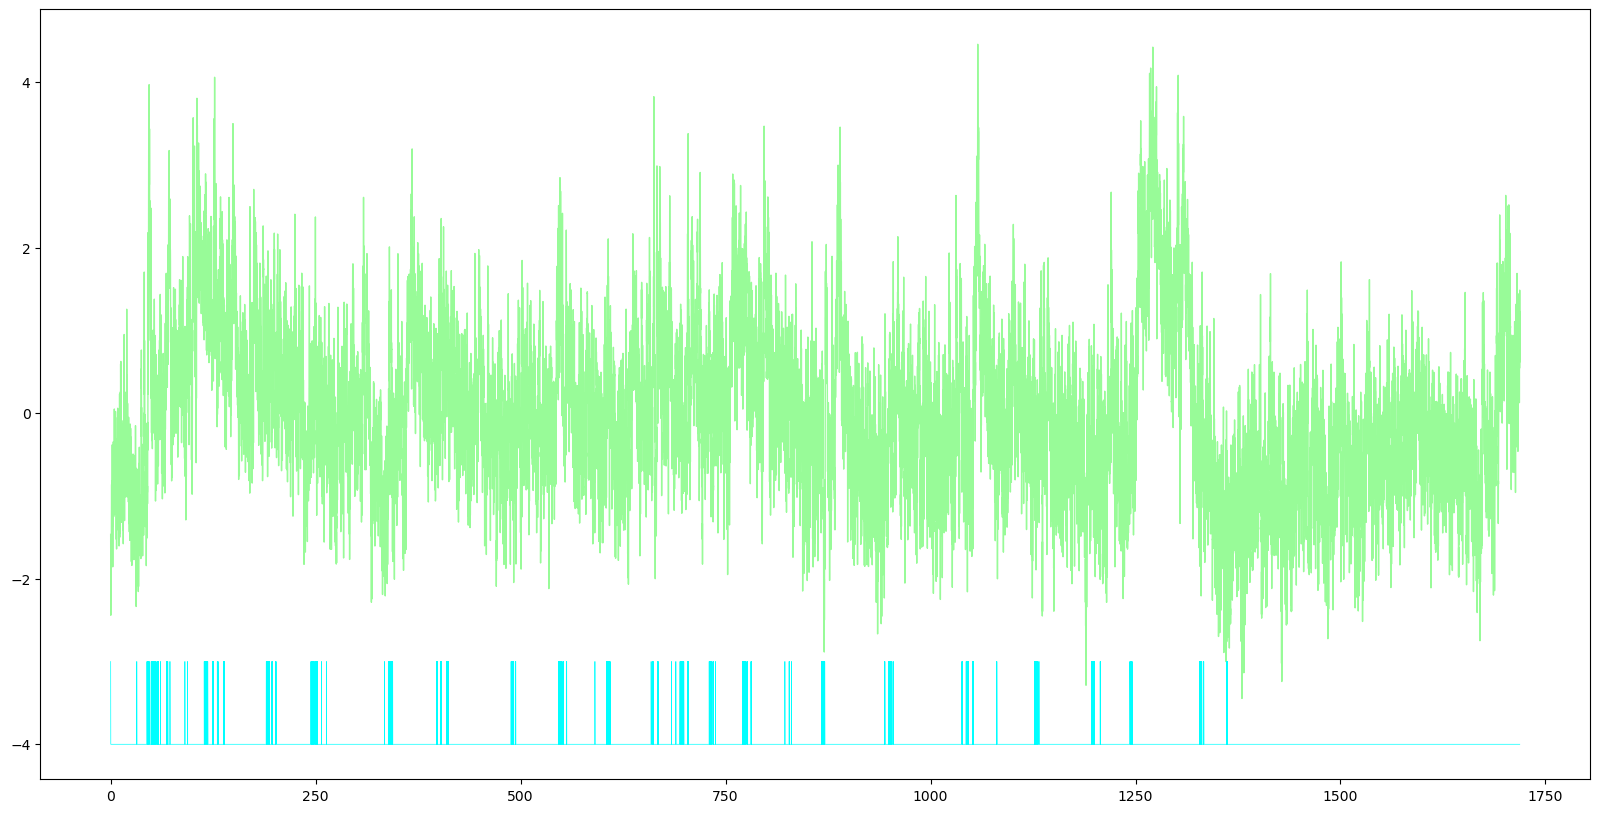

In [73]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(time, lha_z_score_data, linewidth=1, color = 'palegreen')
ax.plot(time, binary_licks, linewidth=0.5, color = 'cyan')